# 1.Introduction to Data Processing with Python

**Problem statement** <br>
Using PIMA Indian Diabetes dataset to predict whether a person has diabetes or not using the medical attributes provided.

** Assumptions **
1. This is enough data to split and reliably predict if the patient has diabetes, the dataset has only 786 data points
2. Just these attributes are enough to diagnose the ailment

The Dataset is available [here](https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes). The original paper using this dataset can be found [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/). This paper from 1984 created a model with a sensitivity and specificity of 76%.

# 2.Data Exploration

Lets pull in the data and see what's in it, Here is what we already know about this data 

****Data Overview : ****
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. 
Several constraints were placed on the selection of these instances from a larger database. In particular, 
all patients here are females at least 21 years old of Pima Indian heritage.

*Columns:*

1.Pregnancies - Number of times pregnant <br>
2.Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test<br>
3.BloodPressure - Diastolic blood pressure (mm Hg)<br>
4.SkinThickness - Triceps skin fold thickness (mm)<br>
5.Insulin - 2-Hour serum insulin (mu U/ml)<br>
6.BMI - Body mass index (weight in kg/(height in m)^2)<br>
7.DiabetesPedigreeFunction - Diabetes pedigree function<br>
8.Age - Age (years)<br>
9.Outcome - Class variable (0 or 1)<br> class value 1 is interpreted as "tested positive" for diabetes<br>

Class distribution: <br>
0 : 500 <br>
1 : 268 <br>

**Data characteristics:**

All the attributes are numeric
The data may contain invalid or null values
Total number of cases presented are 786

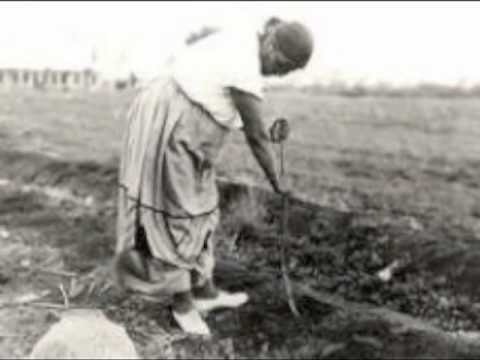

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("pN4HqWRybwk")

## 2.1 Loading CSV data

In [4]:
# Load a CSV file
from csv import reader
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset 

In [6]:
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset: 
        row[column] = float(row[column].strip())

In [8]:
# Load pima-indians-diabetes dataset
filename = 'DataSets/pima-indians-diabetes.data.csv'
pima_data = load_csv(filename)
print('Loaded data file {0} with {1} rows and {2} columns'.format(filename, len(pima_data),len(pima_data[0])))
print(pima_data[0])
# convert string columns to float
for i in range(len(pima_data[0])):
    str_column_to_float(pima_data, i)
print(pima_data[0])
print(type(pima_data))

Loaded data file DataSets/pima-indians-diabetes.data.csv with 768 rows and 9 columns
['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1']
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0, 1.0]
<class 'list'>


In [59]:
print(pima_data)

[[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0, 1.0], [1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0, 0.0], [8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0, 1.0], [1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0, 0.0], [0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0, 1.0], [5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0, 0.0], [3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0, 1.0], [10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0, 0.0], [2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0, 1.0], [8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0, 1.0], [4.0, 110.0, 92.0, 0.0, 0.0, 37.6, 0.191, 30.0, 0.0], [10.0, 168.0, 74.0, 0.0, 0.0, 38.0, 0.537, 34.0, 1.0], [10.0, 139.0, 80.0, 0.0, 0.0, 27.1, 1.441, 57.0, 0.0], [1.0, 189.0, 60.0, 23.0, 846.0, 30.1, 0.398, 59.0, 1.0], [5.0, 166.0, 72.0, 19.0, 175.0, 25.8, 0.587, 51.0, 1.0], [7.0, 100.0, 0.0, 0.0, 0.0, 30.0, 0.484, 32.0, 1.0], [0.0, 118.0, 84.0, 47.0, 230.0, 45.8, 0.551, 31.0, 1.0], [7.0, 107.0, 74.0, 0.0, 0.0, 29.6, 0.254, 31.0, 1.0], [1.0, 103

In [62]:
type(pima_data)

list

**Pandas dataframe**

In [96]:
#Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age	Outcome
import pandas as pd
pima_df = pd.read_csv('DataSets/pima-indians-diabetes.data.csv')
#print(pima_df)

In [112]:
headers = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
pima_df = pd.read_csv('DataSets/pima-indians-diabetes.data.csv',names=headers)
#print(pima_df)

In [113]:
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [93]:
pima_df.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

In [114]:
# this function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


This dataset is known to have missing values.
Specifically, there are missing observations for some columns that are marked as a zero value.

We can see that there are attributes that have a minimum value of zero (0). On some columns, a value of zero does not make sense and indicates an invalid or missing value.

Specifically, the following columns have an invalid zero minimum value:

1: Glucose; 2: Blood pressure; 3: Skin thickness; 4: Insulin; 5: BMI

In [95]:
pima_df.head(25)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# 3. Working with missing Data

We can get a count of the number of missing values on each of these columns. We can do this my marking all of the values in the subset of the DataFrame we are interested in that have zero values as True. We can then count the number of true values in each column.

We can do this my marking all of the values in the subset of the DataFrame we are interested in that have zero values as True. We can then count the number of true values in each column.

In [82]:
print((pima_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


Based on the description above, Plasma glucose levels, blood pressure, skin thickness, insulin and BMI all have min values at 0 which is not the usual case, especially blood pressure, since the diastolic blood pressure most likely cannot be 0 for a living person


**1: Plasma glucose concentration:**<br>

The range is normally 3.9 to 7.2 for non-diabetic patients even after fasting [[Source]](https://en.wikipedia.org/wiki/Blood_sugar_level). Given this, the 0s here are not valid.

**2: Blood Pressure: ** <br>

Based on the information provided for [blood pressure in adults on wikipedia](https://en.wikipedia.org/wiki/Blood_pressure#Classification), any diastolic blood pressure under 60 is considered hypotension which needs to be treated immideately as it indicates not enough blood is reaching the person's organs, the person is considered to be in "shock". Browsing more on this subject there are cases where the diastolic bp is read even lower while not exhibiting signs of hypotension but that's mostly rare. the distolic blood pressure can be low in case the person is sleeping too.
**Assuming** these are normal healthy women who are currently not suffering from hypotension or are in the ER currently being treated for hypotension and they are awake at the time of the data collection, the 0 values are clearly invalid.

**3: Triceps skinfold thickness: **<br>

    for normal healthy adults the skin fold thinkness is not less than 10mm even for girls [[source]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5083983/)

**4: 2-Hour serum insulin: **<br>

In some rare cases a person can have zero insulin but they almost definitely have diabetes, which doesn't seem to be the case as per the data since 374 cases have insulin value 0 but are classified to not having diabetes

**5: Body mass index: **<br>

Based on WebMD data BMI among adults range from 18.5 to 30.0 or higher. Assuming none of these women are extremely short or extremely underweight the BMI should not be 0 or close to 0 [[Source]](https://www.webmd.com/a-to-z-guides/body-mass-index-bmi-for-adults)

We can see that Glucose ,BloodPressure and BMI have just a few zero values, whereas BloodPressure and SkinThickness show a lot more, nearly half of the rows.

This highlights that different “missing value” strategies may be needed for different attributes, e.g. to ensure that there are still a sufficient number of records left to train a predictive model.


***Replacing missing values***<br>

In Python, specifically Pandas, NumPy and Scikit-Learn, we mark missing values as NaN.,br>
Values with a NaN value are ignored from operations like sum, count, etc.<br>

We can mark values as NaN easily with the Pandas DataFrame by using the replace() function on a subset of the columns we are interested in.<br>

After we have marked the missing values, we can use the isnull() function to mark all of the NaN values in the dataset as True and get a count of the missing values for each column.<br>

In [85]:
# mark zero values as missing or NaN
import numpy as np
pima_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = pima_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

# count the number of NaN values in each column
print(pima_df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


# Impute Missing Values

Imputing refers to using a model to replace missing values.
There are many options we could consider when replacing a missing value, for example:<br>

A constant value that has meaning within the domain, such as 0, distinct from all other values.<br>
A value from another randomly selected record.<br>
A mean, median or mode value for the column.<br>
A value estimated by another predictive model.<br>

Any imputing performed on the training dataset will have to be performed on new data in the future when predictions are needed from the finalized model. This needs to be taken into consideration when choosing how to impute the missing values.
For example, if you choose to impute with mean column values, these mean column values will need to be stored to file for later use on new data that has missing values.
Pandas provides the fillna() function for replacing missing values with a specific value.
For example, we can use fillna() to replace missing values with the mean value for each column, as follows:

In [86]:
# fill missing values with mean column values
pima_df.fillna(pima_df.mean(), inplace=True)
# count the number of NaN values in each column
print(pima_df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**Strategies for Handling missing values:**

There are a couple of ways We can handle these invalid data values:

1. Ignore/remove these casses - this may not work in the Skin Thickness and Insulin levels have large number of such invalid data points, removing those would leave us with very little data in an already small dataset. This may work for bmi, glucose and BP invalid data points
2. Put substitute (mean/median etc. ) values - this may not work out in all cases either, e.g. blood pressure, the blood pressure may be correlated to the diabetes therefore putting an average value for BP may provide a wrong signal to the model or reduce its predictive value
3. not using those features for the classification algorthm - this may work, perhaps in the case of skin thickness.


**Series mean.** Replaces missing values with the mean for the entire series.

**Mean of nearby points.** Replaces missing values with the mean of valid surrounding values. The span of nearby points is the number of valid values above and below the missing value used to compute the mean.

**Median of nearby points.** Replaces missing values with the median of valid surrounding values. The span of nearby points is the number of valid values above and below the missing value used to compute the median.

**Linear interpolation.** Replaces missing values using a linear interpolation. The last valid value before the missing value and the first valid value after the missing value are used for the interpolation. If the first or last case in the series has a missing value, the missing value is not replaced.

**Linear trend at point.** Replaces missing values with the linear trend for that point. The existing series is regressed on an index variable scaled 1 to n. Missing values are replaced with their predicted values.
Removing rows with missing values can be too limiting on some predictive modeling problems, an alternative is to impute missing values.,br.

**Algorithm that supports missing values**


The scikit-learn library provides the Imputer() pre-processing class that can be used to replace missing values.
It is a flexible class that allows you to specify the value to replace (it can be something other than NaN) and the technique used to replace it (such as mean, median, or mode). The Imputer class operates directly on the NumPy array instead of the DataFrame.
The example below uses the Imputer class to replace missing values with the mean of each column then prints the number of NaN values in the transformed matrix.

In [102]:
from sklearn.preprocessing import Imputer
# fill missing values with mean column values
values = pima_df.values
print (values)
imputer = Imputer()
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print(np.isnan(transformed_values).sum())

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
0


# 3. Data Visualization

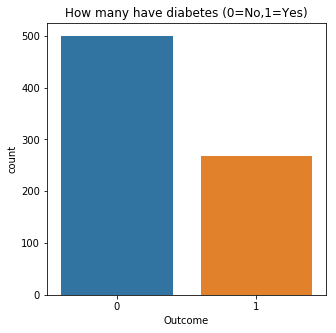

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5)) #figsize=(length, height)
plt.title('How many have diabetes (0=No,1=Yes)')
locs, labels =plt.xticks()
sns.countplot(pima_df['Outcome'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF20E9FC50>,
      dtype=object)

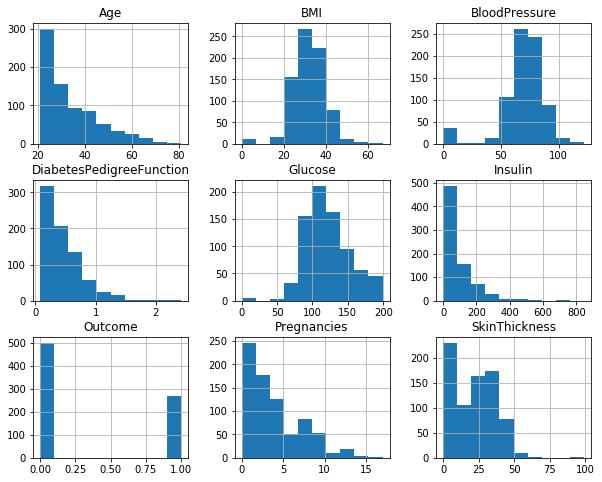

In [105]:
# histogram (Univariate Plots)
# From histogram we can determine whether the distribution is normal-like or not
pima_df.hist(figsize=(10,8))

<Figure size 1080x720 with 0 Axes>

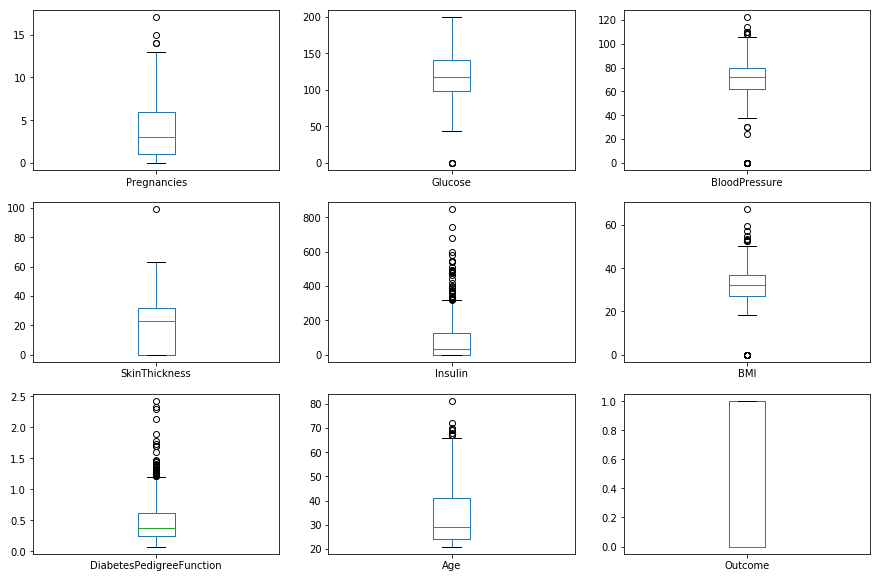

In [108]:
# box and whisker plot (Univariate Plots)
# with this we can determine outliers in dataset
pima_df.plot(kind='box',subplots=True,layout=(3,3),sharex=False, sharey=False,figsize=(15,10))
plt.show()

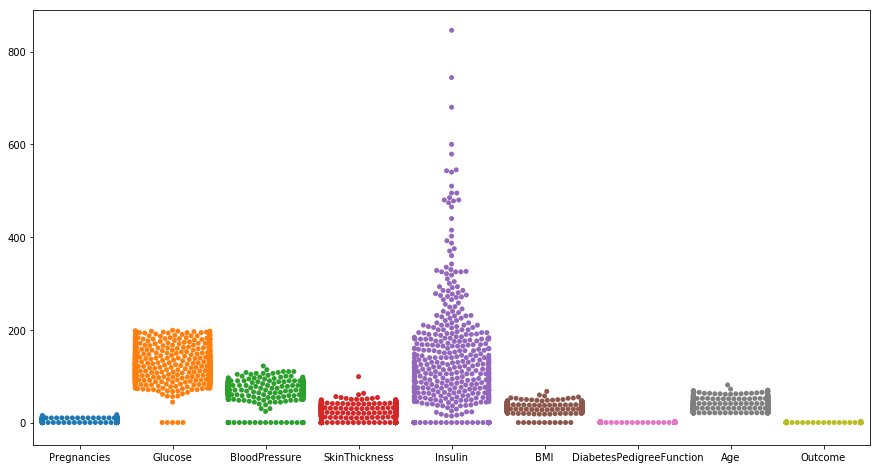

In [111]:
#Plotting all of your data: Bee swarm plots
plt.figure(figsize=(15,8))
_ = sns.swarmplot(data=pima_df)
plt.show()

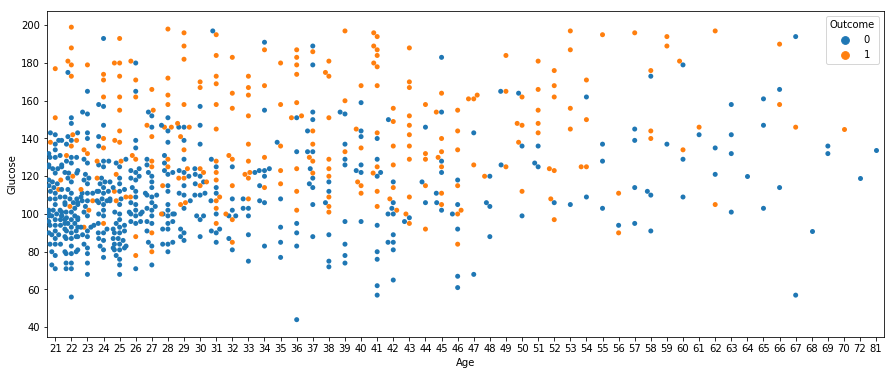

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))  
_ = sns.swarmplot(x='Age',y='Glucose',hue='Outcome',data=pima_df)
plt.show()

In [104]:
#!pip install plotnine

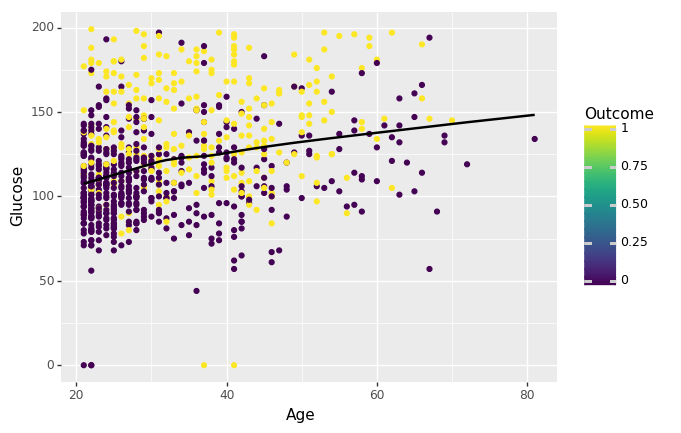

<ggplot: (-9223371912542037837)>

In [115]:
import warnings
warnings.filterwarnings("ignore")
from plotnine import *
ggplot(pima_df,aes(x='Age',y='Glucose',colour='Outcome'))+geom_point()+stat_smooth()


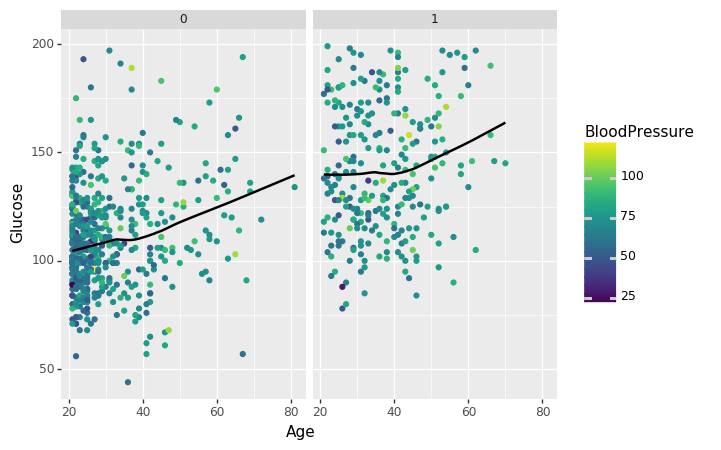

<ggplot: (124312847322)>

In [57]:
ggplot(pima_df,aes(x='Age',y='Glucose',colour = 'BloodPressure'))+geom_point()+stat_smooth()+facet_wrap('~Outcome')

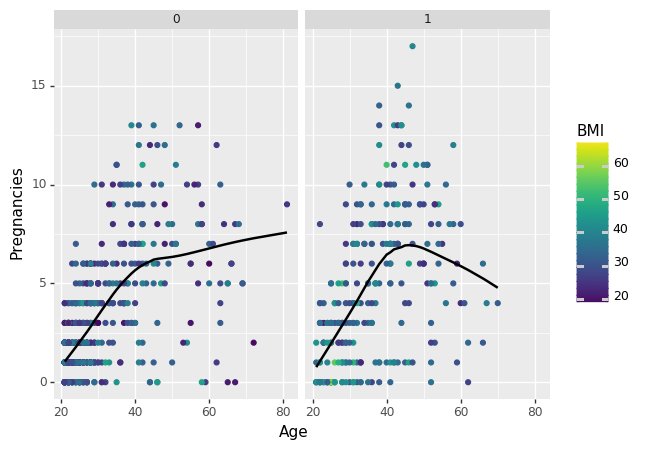

<ggplot: (124313643107)>

In [59]:
ggplot(pima_df,aes(x='Age', y ='Pregnancies'))+geom_point(aes(color='BMI'))+facet_wrap('~Outcome')+stat_smooth()

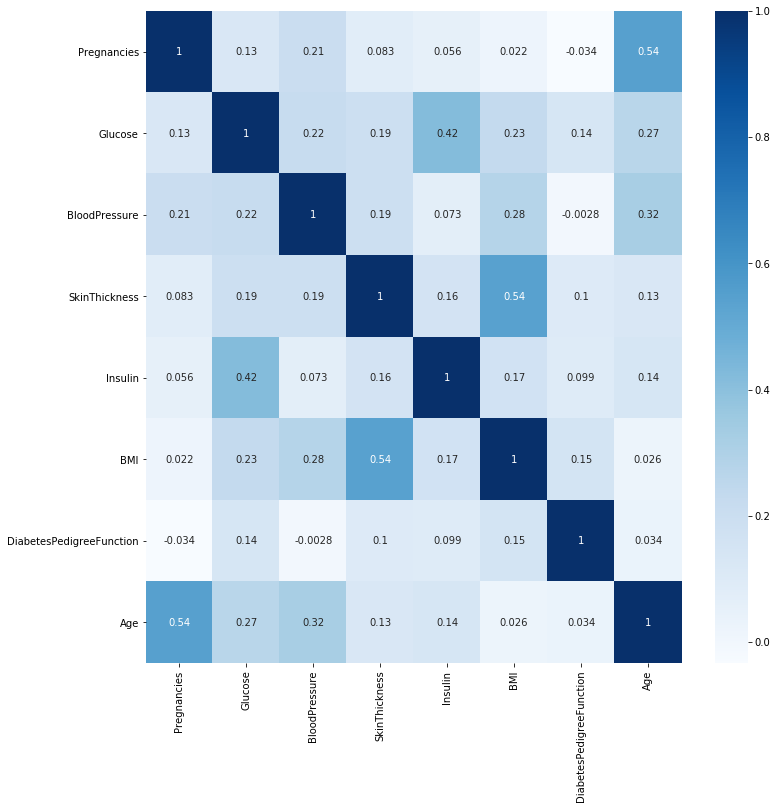

In [60]:
# correlation of each Point
#corr = pima_df[pima_df.columns].corr()
#sns.heatmap(corr, annot = True)
corr = pima_df.loc[:,pima_df.columns!='Outcome'].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap="Blues")

**We can observe that there are correlatiom between some columns** <br>
Age is highly correlated with pregnancies<br>
Insulin is correlated with skin Glucose<br>
skin thickness is correlated with BMI

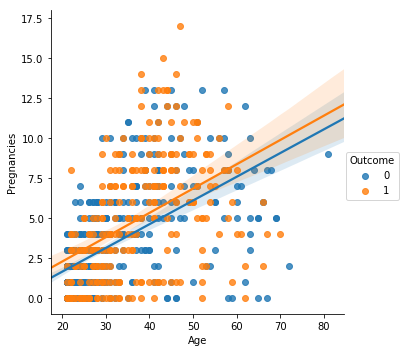

In [61]:
sns.lmplot(x='Age', y = 'Pregnancies', hue = 'Outcome', data = pima_df)

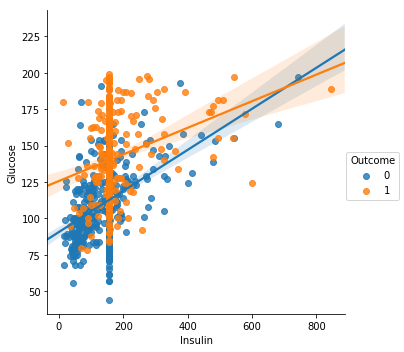

In [64]:
sns.lmplot(x='Insulin', y = 'Glucose', hue = 'Outcome', data = pima_df)

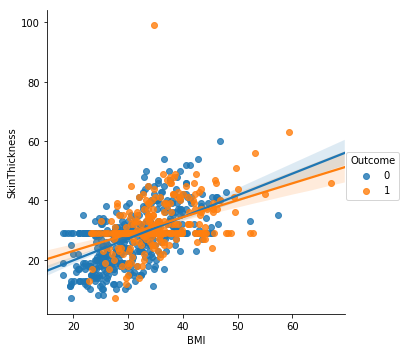

In [65]:
sns.lmplot(x='BMI', y = 'SkinThickness', hue = 'Outcome', data = pima_df)

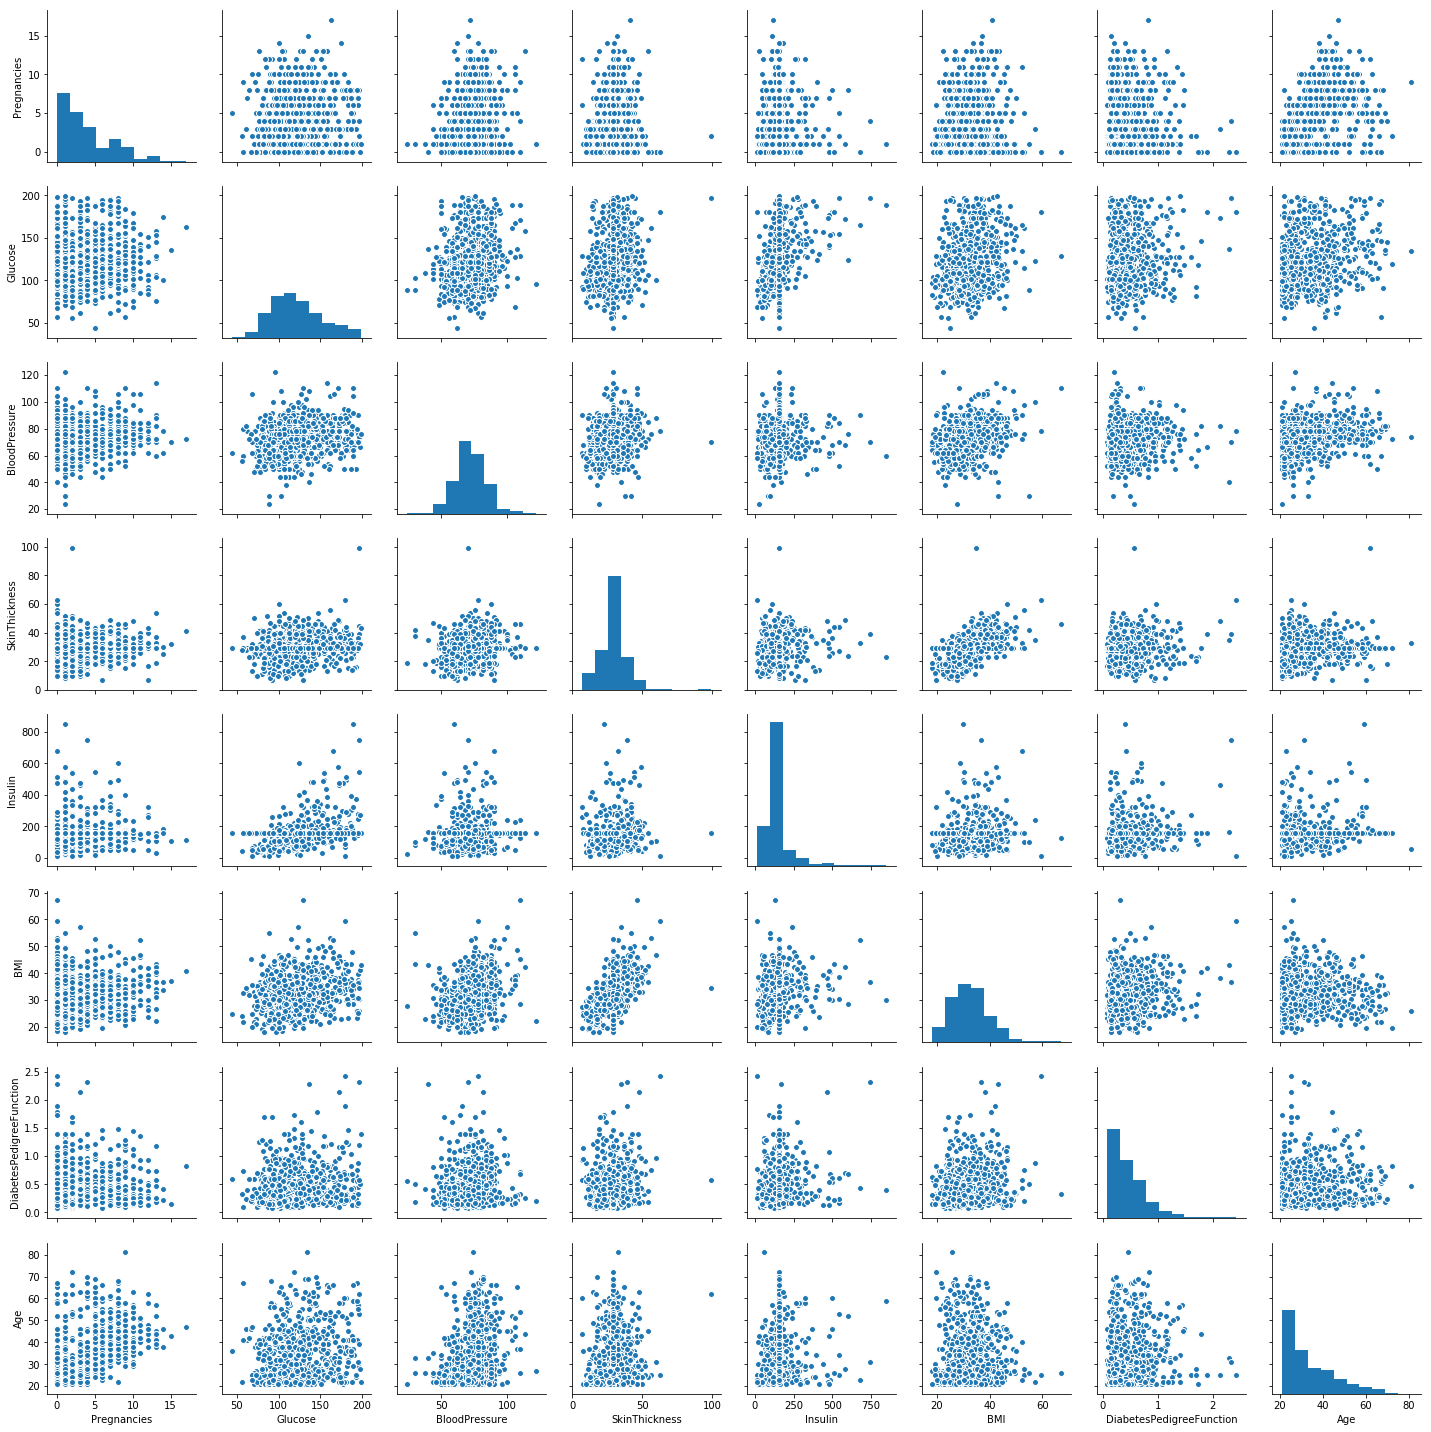

In [67]:
#Visualise pairplot using seaborn which will give plot against each attribute to another attribute
#sns.pairplot(pima_df[['Age','Pregnancies','Insulin','BMI','SkinThickness','Glucose']])
sns.pairplot(pima_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

**Normalize Data**<br>
Normalization can refer to different techniques depending on context. Here, we use normalization to refer to rescaling an input variable to the range between 0 and 1. Normalization requires that you know the minimum and maximum values for each attribute.
This can be estimated from training data or specified directly if you have deep knowledge of the problem domain. You can easily estimate the minimum and maximum values for each attribute in a dataset by enumerating through the values. The snippet of code below defines the dataset minmax() function that calculates the min and max value for each attribute in a dataset, then returns an array of these minimum and maximum values.

**Standardize Data**

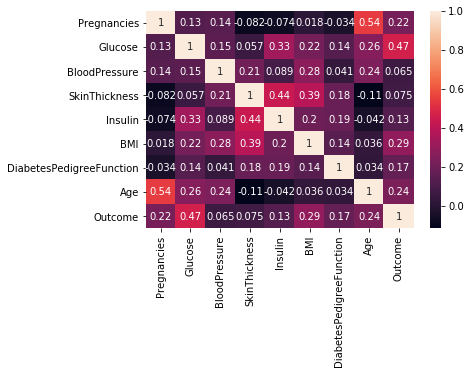

In [118]:
corr = pima_df[pima_df.columns].corr()
sns.heatmap(corr, annot = True)